# Artificial Intelligence
# 464/664
# Assignment #4

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested (it is your responsibility to make sure notebook looks as expected on Gradescope),
03. Use descriptive variable names,
04. Functions should do only one thing,
05. Check submission deadline on Gradescope, 
06. Rename the file to Last_First_assignment_4, 
07. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
08. Do not submit any other files.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

## Game Theory

In this assignment, we're designing an experiment where two players employ the *Best Response with Inertia* algorithm against each other.

## Best Response with Inertia Algorithm

Here is the outline of the algorithm for each player:


```
On day zero, play a random action

On day t, do one of two things:

    * With high probability, play the best response to what your opponent did yesterday, or
    * With low probability, be lazy and just do what you did yesterday.
```

## Game

The particular 2x2 game being played is the Stag-Hunt game, with the matrix:


|  | | |
|---|---|---|
|  | S | H |
| S | 3, 3 | 0, 2 |
| H | 2, 0 | 2, 2 |


Player 1 (P1) is the `row` player; Player 2 (P2) is the `col` player.

In [10]:
import random
import matplotlib.pyplot as plt

In [11]:
# The actions available to each player. Don't modify. 
actions_P1 = ['S', 'H']
actions_P2 = ['S', 'H']

# Store the history. Don't modify. 
history_P1_action, history_P1_utility = [], []
history_P2_action, history_P2_utility = [], []

<a id="get_utility"></a>
## get_utility

This function takes a joint action tuple and returns the utility for each player, packaged as a tuple. It is hardcoded for the Stag-Hunt game described above.

* **a** Tuple: joint action. a could be ('S', 'H'), for instance, which would signify that P1 has chosen to do 'S' and P2 has chosen to do 'H'.


**returns** 

* **utility** Tuple: the utility for each player as (utility of P1, utility of P2). For example, if the input is ('S', 'H'), the returned value is (0, 2) -- 0 for P1, 2 for P2. 

In [12]:
def get_utility(a):
    if a[0] == 'S' and a[1] == 'S':
        return (3, 3)
    elif a[0] == 'S' and a[1] == 'H':
        return (0, 2)
    elif a[0] == 'H' and a[1] == 'S':
        return (2, 0)
    elif a[0] == 'H' and a[1] == 'H':
        return (2, 2)

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <p>
        TODO: Help players pick actions based on the <i>Best Response with inertia</i> algorithm described above (instead of just picking 'S' like they are now). 
    </p>
</div>

In [13]:
import random

<a id="best_response"></a>
## best_response

This function takes previous moves as a tuple, the probability of choosing a lazy move, and the player status and returns an action for the player based on the "Best Response with Inertia" algorithm.

* **prev_move** Tuple: previous move. a could be ('S', 'H'), for instance, which would signify that P1 chose to do 'S' and P2 chose to do 'H'.
* **lazy_prob** Float: probabilty of the player choosing yesterday's response
* **is_one** Boolean: status of the player. True if P1, False if P2. 

**returns** 

* **move** Char: the selected action for the player, either H or S.

In [14]:
def best_response(prev_move, lazy_prob, is_one):
    if random.random() < lazy_prob: return prev_move[0] if is_one else prev_move[1]
    elif is_one:
        if prev_move[1] == 'S':
            return 'S' if get_utility(['S', 'S'])[0] >= get_utility(['H', 'S'])[0] else 'H'
        elif prev_move[1] == 'H':
            return 'S' if get_utility(['S', 'H'])[0] >= get_utility(['H', 'H'])[0] else 'H'
    else:
        if prev_move[0] == 'S':
            return 'S' if get_utility(['S', 'S'])[1] >= get_utility(['S', 'H'])[1] else 'H'
        elif prev_move[0] == 'H':
            return 'S' if get_utility(['H', 'S'])[1] >= get_utility(['H', 'H'])[1] else 'H'

<a id="run_experiment"></a>
## run_experiment

This functions runs an experiment where two players play the Stag-Hunt game using the Best Response with Inertia algorithm.

* **num_trials** Int: The number of trials to run
* **num_days** Int: The number of days in each trial
* **debug** Bool: If set to True, statements are printed out


**returns** 

None

In [15]:
def run_experiment(num_trials, num_days, debug=True):
    if debug: print(f"Trial\tDay\tP1\tP2\n--------------------------")
    for trial in range(num_trials):  
        if debug: print(f"--------------------------")
        for day in range(num_days):
            if day == 0:
                action_P1, action_P2 = random.choice(['S','H']), random.choice(['S','H'])
            else:
                action_P1 = best_response(prev_move, 0.2, True)
                action_P2 = best_response(prev_move, 0.2, False)
            prev_move = [action_P1, action_P2]
            # Don't modify below:
            utility_P1, utility_P2 = get_utility(tuple((action_P1, action_P2)))
            history_P1_action.append(action_P1)
            history_P2_action.append(action_P2)
            history_P1_utility.append(utility_P1)
            history_P2_utility.append(utility_P2)
            if debug: print(f"{trial}\t{day}\t{action_P1}\t{action_P2}")

In [16]:
# Parameters. Don't modify. Not even debug flag. 
run_experiment(num_trials=20, num_days=10, debug=True)

Trial	Day	P1	P2
--------------------------
--------------------------
0	0	S	H
0	1	H	S
0	2	S	H
0	3	H	S
0	4	H	H
0	5	H	H
0	6	H	H
0	7	H	H
0	8	H	H
0	9	H	H
--------------------------
1	0	H	H
1	1	H	H
1	2	H	H
1	3	H	H
1	4	H	H
1	5	H	H
1	6	H	H
1	7	H	H
1	8	H	H
1	9	H	H
--------------------------
2	0	S	S
2	1	S	S
2	2	S	S
2	3	S	S
2	4	S	S
2	5	S	S
2	6	S	S
2	7	S	S
2	8	S	S
2	9	S	S
--------------------------
3	0	H	S
3	1	S	S
3	2	S	S
3	3	S	S
3	4	S	S
3	5	S	S
3	6	S	S
3	7	S	S
3	8	S	S
3	9	S	S
--------------------------
4	0	S	H
4	1	S	H
4	2	H	S
4	3	S	H
4	4	S	S
4	5	S	S
4	6	S	S
4	7	S	S
4	8	S	S
4	9	S	S
--------------------------
5	0	S	S
5	1	S	S
5	2	S	S
5	3	S	S
5	4	S	S
5	5	S	S
5	6	S	S
5	7	S	S
5	8	S	S
5	9	S	S
--------------------------
6	0	H	H
6	1	H	H
6	2	H	H
6	3	H	H
6	4	H	H
6	5	H	H
6	6	H	H
6	7	H	H
6	8	H	H
6	9	H	H
--------------------------
7	0	S	H
7	1	H	S
7	2	S	H
7	3	S	S
7	4	S	S
7	5	S	S
7	6	S	S
7	7	S	S
7	8	S	S
7	9	S	S
--------------------------
8	0	H	S
8	1	S	H
8	2	H	H
8	3	H	H
8	4	H	H
8	5	H	H
8	6	H	H
8	7	H	H
8	8	H	H
8	

<a id="plot_results"></a>
## plot_results

This functions plots the results of an experiment using a bar chart.

* **history_P1_action** List[Str]: The history of Player 1's actions over the course of the experiment 
* **history_P2_action** List[Str]: The history of Player 2's actions over the course of the experiment 


**returns** 

None

In [17]:
def plot_results(history_P1_action, history_P2_action):
    labels = ['(S,S)', '(S,H)', '(H,S)', '(H,H)']
    cell_counts = [0, 0, 0, 0]
    for i in range(len(history_P1_action)):
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'S':
            cell_counts[0]+=1
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'H':
            cell_counts[1]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'S':
            cell_counts[2]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'H':
            cell_counts[3]+=1
    plt.bar(labels, cell_counts)
    plt.show()

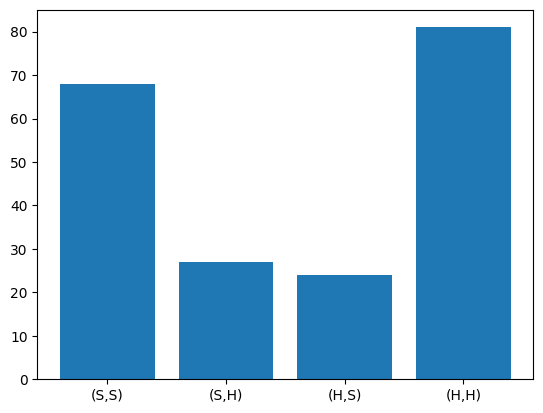

In [18]:
# Visualize the results. Don't modify. 
plot_results(history_P1_action, history_P2_action)

| Question | Comment | 
|------|------|
|Where do agents get stuck? Why? | The agents get stuck based on the first selected move. After the first four moves or so, the agents usually end up selecting the same choices repeatedly. For example, if both player select S as their first move, they will continually select S if choosing based on the previous player's move because the agent anticipates the other agent will also select S, yielding a max score of 3. Similarly, if the agents both select H, they will continually select H if choosing logically because if the agents select S, based on the previous move, they will get a score of 0. Therefore, both agents again choose H to recieve a score of 2. Finally, if the agents select different starting moves, they will select the alternate move on the next day because they anticipate the opposite agent selecting the same move, which would result in a score of 2 or 3. However, they actually get a score of zero since they predict the next move based on the previous. In all cases, this leads to predictable repetition where the agents get stuck. Of course, if the move is randomly selected, the agents will get stuck in a different loop. The reason why SH and HS occur less frequently is because if SH or HS is the first random move, if at any point a player decides to play their previous move, we become locked in the HH or SS moves. If we start with HH or SS, randomly choosing a previous move yields the same choice as the "informed" move. HH and SS will therefore appear at a higher rate than HS and SH. |

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".